# Crowd-sourced decision-making
## Author: Snigdhayan Mahanta
In this notebook I simulate the effect on overall decision accuracy arising from the composition of random, bad, good and excellent decision-makers in the setup of crowd-sourced decision-making.

    - A decision consists of a few options with one of them being correct.
    - A decision-maker is classified as random, bad, good or excellent according to the probability of making the correct decision.

I specify the relative weights of random, bad, good and excellent decision makers. Then I create a population distribution according to the relative weights and let them decide independently. Finally, I identify the decision of the majority of the population and check if it is correct. I simulate the whole process over various population sizes and compute the overall accuracy of the majority decision.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Global parameters of the experiment

n_options = 2 # the number of decision options to choose from
random_weight = 10 # the weight of random decision-makers
bad_weight = 50 # the weight of bad decision-makers
good_weight = 40 # the weight of good decision-makers
excellent_weight = 10 # the weight of excellent decision-makers

In [3]:
# Create the population distribution of random, bad, good and excellent decision-makers

total_weight = random_weight + bad_weight + good_weight + excellent_weight
population_distribution = np.asarray([random_weight, bad_weight, good_weight, excellent_weight])/total_weight

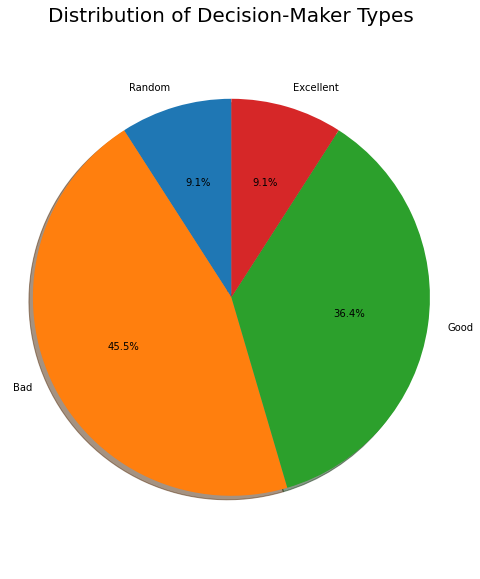

In [4]:
# Pie chart of decision-maker types
fig, ax = plt.subplots(1, figsize=(8,10))
labels = ["Random", "Bad", "Good", "Excellent"]
sizes = population_distribution

ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, normalize=True)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Distribution of Decision-Maker Types', size=20)

plt.show()

In [5]:
# Decision setup - options to choose from and the correct option

decision_options = np.asarray(range(1, n_options+1)) # decision options
correct_option = np.random.choice(decision_options) # the correct option

In [6]:
# Each decision-maker has a set of options and intuitions expressed as a probability distribution over the options

class decision_maker:
    '''
    generic decision-maker
    
    '''
    
    options = decision_options
    intuitions = np.ones(n_options)*(100/n_options) # all decision options are equally likely
    
    def __init__(self):
        pass

    def decide(self):
        return np.random.choice(self.options, p=self.intuitions)

In [7]:
class random_decision_maker(decision_maker):
    '''
    randomly makes a decision
    
    '''

    def __init__(self): 
        array = np.random.choice(range(1,100), n_options) # probability of correct decision is random
        self.intuitions = array/sum(array)

In [8]:
class bad_decision_maker(decision_maker):
    '''
    unlikely to make the correct decision
    
    '''
    
    def __init__(self):
        array = np.random.choice(range(1,100), n_options)
        array[correct_option-1] = min(array)/2 # probability of correct decision is very low
        self.intuitions = array/sum(array)

In [9]:
class good_decision_maker(decision_maker):
    '''
    quite likely to make the correct decision
    
    '''
    
    def __init__(self):
        array = np.random.choice(range(1,100), n_options)
        array[correct_option-1] = 2*max(array) # probability of correct decision is quite high
        self.intuitions = array/sum(array)

In [10]:
class excellent_decision_maker(decision_maker):
    '''
    makes the correct decision with very high probability
    
    '''
    
    def __init__(self):
        array = np.random.choice(range(1,100), n_options)
        array[correct_option-1] = 10*max(array) # probability of correct decision is extremely high
        self.intuitions = array/sum(array)

In [11]:
def crowd_source_decisions(population_size, population_distn):
    '''
    creates a population of decision-makers according to population distribution and returns their decisions

    '''
    
    decisions = []
    
    for i in range(1, population_size+1):
        decision_maker_type = np.random.choice(len(population_distn), p=population_distn)
        if (decision_maker_type==0):
            decision_maker = random_decision_maker()
            decisions.append(decision_maker.decide())
        if (decision_maker_type==1):
            decision_maker = bad_decision_maker()
            decisions.append(decision_maker.decide())
        if (decision_maker_type==2):
            decision_maker = good_decision_maker()
            decisions.append(decision_maker.decide())
        if (decision_maker_type==3):
            decision_maker = excellent_decision_maker()
            decisions.append(decision_maker.decide())
                
    return decisions

In [12]:
def simulate_decision_making(n_trials, population_distn):
    '''
    simulate crowd-sourced decision-making for a certain number of trials

    '''
    
    n_decision_makers = [] # the numbers of the decision-makers involved in the trials
    accuracy_values = [] # the percentages of the correct decisions in the trials
    majority_decision = [] # the outcomes of the majority decisions in the trials
    
    for i in range(1, n_trials+1):
        number = i*10 # number of decision makers
        population_decisions = crowd_source_decisions(number, population_distn)
        n_decision_makers.append(number)
        accuracy_values.append((sum(population_decisions == correct_option)/(i*10))*100)
        majority_decision.append(max(population_decisions, key=population_decisions.count))
        
    return n_decision_makers, accuracy_values, majority_decision

In [13]:
# Define the number of simulation trials and run the simulation

n_trials = 100 # the number of trials for the simulation
n_decision_makers, accuracy_values, majority_decision = simulate_decision_making(n_trials, population_distribution)

In [14]:
# Compute the overall accuracy of the majority decision

majority_decision_accuracy = round((sum(majority_decision == correct_option)*100)/len(majority_decision),2)

# Also compute the expected accuracy of random decision-making if all options are equally likely

random_decision_accuracy = 100/n_options 

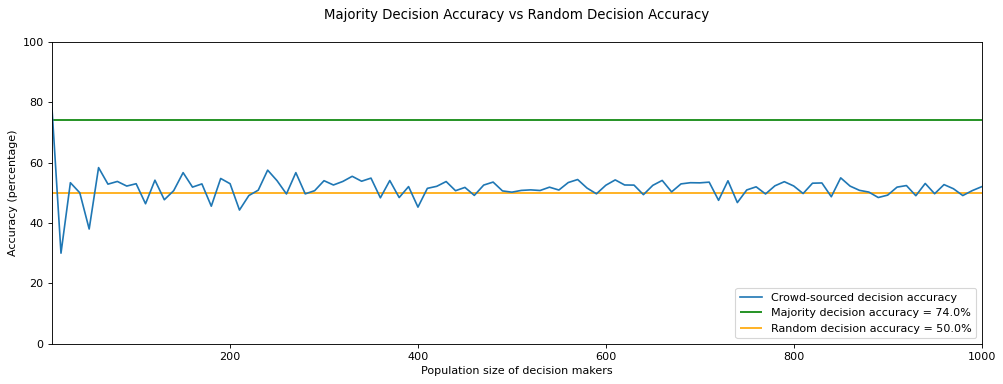

In [15]:
# Plot results

# x-axis values 
x = n_decision_makers
# y-axis values 
y = accuracy_values

# Plot the points
plt.figure(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y) 

plt.hlines(majority_decision_accuracy, min(x), max(x), color='green')
plt.hlines(100/n_options, min(x), max(x), color='orange')

# x-axis name
plt.xlabel('Population size of decision makers') 
# y-axis name 
plt.ylabel('Accuracy (percentage)') 

# Graph title
plt.title(F'Majority Decision Accuracy vs Random Decision Accuracy\n') 


# Plot legends
plt.xlim((min(x), max(x)))
plt.ylim(0, 100)
legends = [F'Crowd-sourced decision accuracy', 
           F'Majority decision accuracy = {majority_decision_accuracy}%', 
           F'Random decision accuracy = {random_decision_accuracy}%']
plt.legend(legends, loc='lower right')

# Display the graph
plt.show() 

The graph demonstrates how a few excellent decision-makers can improve upon the baseline, namely, the accuracy of random decision-making. The challenge for an organization is to identify the good and excellent decision-makers and spread them judiciously.